In [33]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [34]:
df = pd.read_csv("../Archivos/profesionales.csv", index_col= 0)

In [35]:
df.salario.isnull().sum()*100/df.shape[0]

10.428912297037769

## OUTLIERS

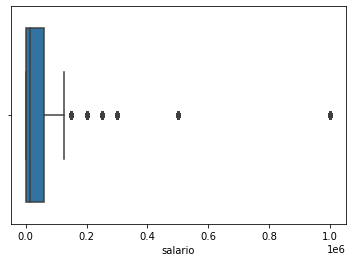

In [36]:
sns.boxplot(x= "salario", data=df)
plt.show()

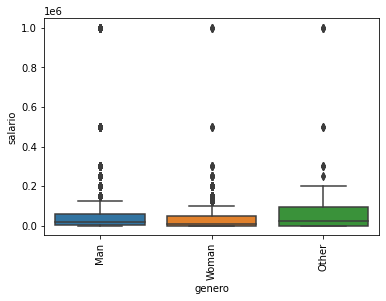

In [37]:
sns.boxplot(x = "genero", y = "salario", data = df)
plt.xticks(rotation = 90);

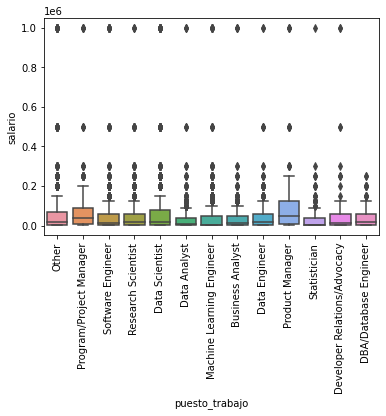

In [38]:
sns.boxplot(x = "puesto_trabajo", y = "salario", data = df)
plt.xticks(rotation = 90);

In [39]:
def detectar_outliers(dataframe):
    lista_columnas = list(dataframe.select_dtypes(include= np.number).columns)
    # creamos un diccionario donde almacenaremos índices de los outliers
    dicc_indices = {} 
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    return dicc_indices

In [40]:
# Ejecutamos la función y guardamos la lista de indices
indices_outliers = detectar_outliers(df)

In [41]:
print(indices_outliers)

{'salario': [76, 80, 89, 121, 158, 167, 184, 191, 239, 283, 285, 287, 354, 397, 434, 446, 454, 457, 488, 505, 513, 515, 517, 524, 527, 556, 630, 647, 648, 658, 698, 705, 711, 737, 741, 743, 745, 749, 859, 885, 895, 906, 937, 968, 979, 1025, 1068, 1076, 1087, 1129, 1214, 1218, 1262, 1263, 1280, 1314, 1322, 1373, 1427, 1496, 1516, 1533, 1538, 1547, 1554, 1568, 1573, 1587, 1611, 1624, 1625, 1648, 1650, 1661, 1688, 1710, 1742, 1750, 1759, 1783, 1815, 1831, 1879, 1899, 1914, 1923, 1929, 1975, 1987, 2006, 2014, 2060, 2087, 2149, 2167, 2178, 2179, 2190, 2213, 2217, 2232, 2242, 2252, 2270, 2290, 2299, 2360, 2382, 2435, 2436, 2438, 2440, 2447, 2458, 2489, 2556, 2557, 2560, 2587, 2599, 2605, 2648, 2666, 2669, 2734, 2777, 2840, 2875, 2887, 2888, 2903, 2905, 2908, 2910, 2915, 3027, 3035, 3060, 3077, 3084, 3100, 3179, 3243, 3284, 3288, 3310, 3324, 3349, 3408, 3444, 3509, 3523, 3538, 3549, 3556, 3570, 3578, 3592, 3597, 3603, 3614, 3635, 3645, 3697, 3704, 3706, 3707, 3717, 3799, 3802, 3829, 3861, 398

In [42]:
len(indices_outliers["salario"]) *100 / df.shape[0]

7.006925449572251

In [43]:
for k, v in indices_outliers.items():
    mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = mediana

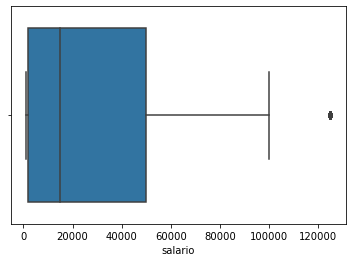

In [44]:
sns.boxplot(x= "salario", data=df)
plt.show()

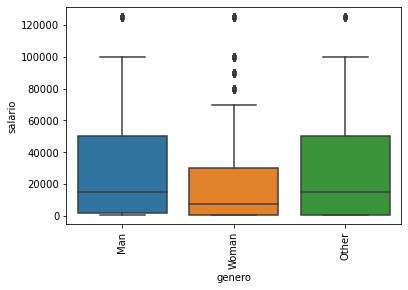

In [45]:
sns.boxplot(x = "genero", y = "salario", data = df)
plt.xticks(rotation = 90);

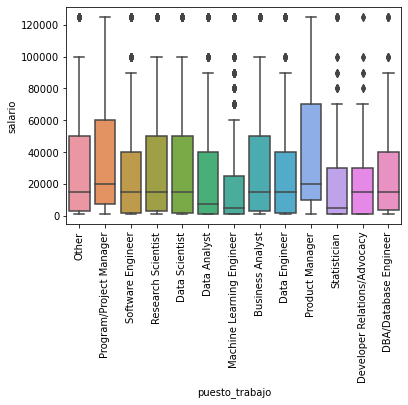

In [46]:
sns.boxplot(x = "puesto_trabajo", y = "salario", data = df)
plt.xticks(rotation = 90);

In [47]:
def reemp_nulos_num_KNN(dataf):
    # Primero sacamos las variables numéricas con select_dtypes
    num = dataf.select_dtypes(include = np.number)
    # Iniciamos el KNNimputer
    imputerKNN = KNNImputer(n_neighbors=5)
    # Aplicamos el imputer a las variables numericas
    imputerKNN.fit(num)
    # Transformamos los datos para que se transformen los nulos, y como nos devuelve un array
    # lo transformamos directamente en dataframe
    df_knn = pd.DataFrame(imputerKNN.transform(num), columns = num.columns)
    # Sacamos el nombre de las columnas del data sin nulos
    columnas = df_knn.columns
    # Utilizando esta lista de columnas, eliminamos estas del dataframe
    dataf.drop(columnas, axis= 1, inplace = True)
    # creamos nuevas columnas en el dataframe original, basándonos en estas columnas numericas sin nulos
    dataf[columnas] = df_knn[columnas]
    # Nos devuelve la suma de nulos del dataframe, para comprobar que se hayan borrado los nulos
    return dataf.isnull().sum()

In [48]:
reemp_nulos_num_KNN(df)

edad                                           0
genero                                         0
pais                                           0
estudios                                       0
puesto_trabajo                                 0
experiencia                                    0
lenguaje_recomendado                         964
experiencia_ML                              1445
industria                                    858
tamaño_empresa                               932
herramienta_DA                              3757
lenguaje_utilizado                           963
IDE                                          967
herramientas_visualizacion                  1366
Q16_frame_ml                                3734
Q17_alg_ml                                  3828
Q32_prod_bigdata                            7699
Q34_herramientas_bi                         7784
Q28                                        14056
q10_notebooks                               1023
q39_plat_compartir_t

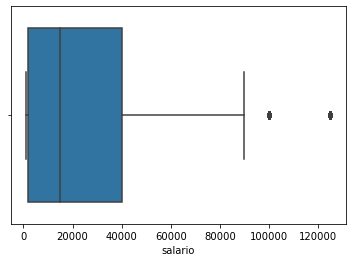

In [49]:
sns.boxplot(x= "salario", data=df)
plt.show()

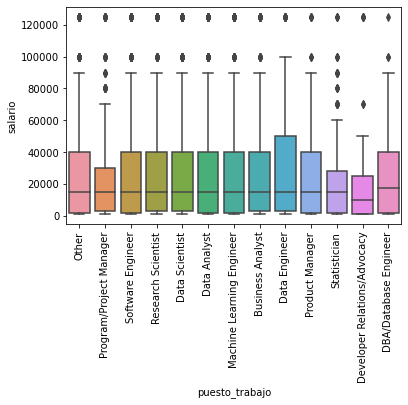

In [50]:
sns.boxplot(x = "puesto_trabajo", y = "salario", data = df)
plt.xticks(rotation = 90);

In [51]:
df.head()

,edad,genero,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q28,q10_notebooks,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml,salario
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,"Kaggle Notebooks,Colab Notebooks",NaN,"Kaggle Learn Courses,Cloud-certification progr...","Google Cloud Platform (GCP) , Oracle Cloud",Google Cloud Compute Engine,None,"MySQL ,SQLite ,Oracle Database ,Google Cloud SQL","Google Data Studio,Qlik","Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML,None,70000.0
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees","Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,"MySQL , MongoDB",None,NaN,Kaggle Notebooks,I do not share my work publicly,DataCamp,"Amazon Web Services (AWS) , Google Cloud Plat...","Microsoft Azure Virtual Machines , Google Clo...","Azure Machine Learning Studio , Google Cloud ...","MySQL ,PostgreSQL ,MongoDB","Microsoft Power BI,Tableau","Automated model selection (e.g. auto-sklearn, ...",DataRobot AutoML,TensorBoard,1000.0
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,5-10 years,Academics/Education,"1000-9,999 employees","Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",NaN,NaN,NaN,Colab Notebooks,NaN,"Coursera,edX","Amazon Web Services (AWS) , Microsoft Azure","Microsoft Azure Virtual Machines , Google Clo...",None,None,None,None,NaN,None,40000.0
4,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,10-20 years,Academics/Education,50-249 employees,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",None,Microsoft Power BI,NaN,Google Cloud Datalab,I do not share my work publicly,"Kaggle Learn Courses,Udemy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.0


In [52]:
df["q36b_cat_herramientas_familiar_ml"].isnull().sum() *100 / df.shape[0]

67.17686085084095

In [53]:
df["Q34_herramientas_bi"].isnull().sum()

7784

In [54]:
df["Q34_herramientas_bi"].value_counts()

 None                                                                                                                    4123
 Tableau                                                                                                                  987
 Microsoft Power BI                                                                                                       887
 Microsoft Power BI, Tableau                                                                                              564
 Google Data Studio                                                                                                       286
                                                                                                                         ... 
 Microsoft Power BI, Tableau, Salesforce, Other                                                                             1
 Alteryx , Microsoft Azure Synapse                                                                                    

In [55]:
df.to_csv("../Archivos/profesionales_nonull.csv") 